In [1]:
import re

import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("train.csv")
data.head()

C:\Users\AbdElrahman_Elmagry\AppData\Local\Temp\ipykernel_18224\799056672.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
data.columns


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [9]:
to_remove = ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Type_of_Loan']
data = data.drop(columns=to_remove)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  object 
 1   Monthly_Inhand_Salary     84998 non-null   float64
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Num_of_Loan               100000 non-null  object 
 6   Delay_from_due_date       100000 non-null  int64  
 7   Num_of_Delayed_Payment    92998 non-null   object 
 8   Changed_Credit_Limit      100000 non-null  object 
 9   Num_Credit_Inquiries      98035 non-null   float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  object 
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        90970 non-null   ob

In [11]:
data.columns

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [13]:
columns = [
    'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
    'Num_Credit_Inquiries', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance'
]
for col in columns:
    print("\n")
    print(data[col].describe())
    print(data[col].unique())




count       100000
unique       18940
top       36585.12
freq            16
Name: Annual_Income, dtype: object
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']


count     100000
unique       434
top            3
freq       14386
Name: Num_of_Loan, dtype: object
['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1047' '1035' '1347_' '33' '193' '699' '329' '1451' '484' '132'
 '649' '995' '545' '684' '1135' '1094' '1204' '654' '58' '348' '614'
 '1363' '323' '1406' '1348' '430' '153' '1461' '905' '1312' '1424' '1154'
 '95' '1353' '1228' '819' '1006' '795' '359' '1209' '590' '696' '1185_'
 '1465' '911' '1181' '70' '816' '1369' '143' '1416' '

In [15]:
for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")
    print("\n")
    print(data[col].info())



<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Annual_Income
Non-Null Count  Dtype  
--------------  -----  
93020 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_of_Loan
Non-Null Count  Dtype  
--------------  -----  
95215 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_of_Delayed_Payment
Non-Null Count  Dtype  
--------------  -----  
90254 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Changed_Credit_Limit
Non-Null Count  Dtype  
--------------  -----  
97909 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_

In [17]:
data['Credit_History_Age'].unique()


array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and

In [19]:
def age_to_days(age):
    if age is np.nan:
        return age
    years = 0
    months = 0
    years_match = re.search(r'(\d+)\s*Years?', age)
    months_match = re.search(r'(\d+)\s*Months?', age)
    if years_match:
        years = int(years_match.group(1))
    if months_match:
        months = int(months_match.group(1))
    return (years * 365) + (months * 30)
    
data['Credit_History_Age'] = data['Credit_History_Age'].apply(age_to_days)
data['Credit_History_Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Credit_History_Age
Non-Null Count  Dtype  
--------------  -----  
90970 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [21]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             93020 non-null   float64
 1   Monthly_Inhand_Salary     84998 non-null   float64
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Num_of_Loan               95215 non-null   float64
 6   Delay_from_due_date       100000 non-null  int64  
 7   Num_of_Delayed_Payment    90254 non-null   float64
 8   Changed_Credit_Limit      97909 non-null   float64
 9   Num_Credit_Inquiries      98035 non-null   float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          98991 non-null   float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        90970 non-null   fl

In [23]:
columns = [
    'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Num_of_Delayed_Payment',
    'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_History_Age',
    'Amount_invested_monthly', 'Monthly_Balance'
]
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data[columns] = imputer.fit_transform(data[columns])
for col in columns:
    print('\n')
    print(data[col].info())




<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Annual_Income
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Monthly_Inhand_Salary
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_of_Loan
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_of_Delayed_Payment
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Seri

In [25]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  float64
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Num_of_Loan               100000 non-null  float64
 6   Delay_from_due_date       100000 non-null  int64  
 7   Num_of_Delayed_Payment    100000 non-null  float64
 8   Changed_Credit_Limit      100000 non-null  float64
 9   Num_Credit_Inquiries      100000 non-null  float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        100000 non-null  fl

In [27]:
data['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [29]:
data['Credit_Mix'] = data['Credit_Mix'].replace('_', 'Standard')
data['Credit_Mix'].unique()

array(['Standard', 'Good', 'Bad'], dtype=object)

In [31]:
le = LabelEncoder()
data['Credit_Mix'] = le.fit_transform(data['Credit_Mix'])
data['Credit_Mix'].info()
data['Credit_Mix'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Credit_Mix
Non-Null Count   Dtype
--------------   -----
100000 non-null  int32
dtypes: int32(1)
memory usage: 390.8 KB


array([2, 1, 0])

In [33]:
data['Payment_Behaviour'].unique()


array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [35]:
data = data[data['Payment_Behaviour'] != '!@9#%8']
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92400 entries, 0 to 99998
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             92400 non-null  float64
 1   Monthly_Inhand_Salary     92400 non-null  float64
 2   Num_Bank_Accounts         92400 non-null  int64  
 3   Num_Credit_Card           92400 non-null  int64  
 4   Interest_Rate             92400 non-null  int64  
 5   Num_of_Loan               92400 non-null  float64
 6   Delay_from_due_date       92400 non-null  int64  
 7   Num_of_Delayed_Payment    92400 non-null  float64
 8   Changed_Credit_Limit      92400 non-null  float64
 9   Num_Credit_Inquiries      92400 non-null  float64
 10  Credit_Mix                92400 non-null  int32  
 11  Outstanding_Debt          92400 non-null  float64
 12  Credit_Utilization_Ratio  92400 non-null  float64
 13  Credit_History_Age        92400 non-null  float64
 14  Payment_of_

In [37]:
le = LabelEncoder()
data['Payment_Behaviour'] = le.fit_transform(data['Payment_Behaviour'])
data['Payment_Behaviour'].info()
data['Payment_Behaviour'].unique()

<class 'pandas.core.series.Series'>
Index: 92400 entries, 0 to 99998
Series name: Payment_Behaviour
Non-Null Count  Dtype
--------------  -----
92400 non-null  int32
dtypes: int32(1)
memory usage: 1.1 MB


array([2, 3, 4, 5, 1, 0])

In [39]:
data['Payment_of_Min_Amount'].unique()


array(['No', 'NM', 'Yes'], dtype=object)

In [41]:
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].replace('NM', 'No')
data.info()
data['Payment_of_Min_Amount'].unique()

<class 'pandas.core.frame.DataFrame'>
Index: 92400 entries, 0 to 99998
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             92400 non-null  float64
 1   Monthly_Inhand_Salary     92400 non-null  float64
 2   Num_Bank_Accounts         92400 non-null  int64  
 3   Num_Credit_Card           92400 non-null  int64  
 4   Interest_Rate             92400 non-null  int64  
 5   Num_of_Loan               92400 non-null  float64
 6   Delay_from_due_date       92400 non-null  int64  
 7   Num_of_Delayed_Payment    92400 non-null  float64
 8   Changed_Credit_Limit      92400 non-null  float64
 9   Num_Credit_Inquiries      92400 non-null  float64
 10  Credit_Mix                92400 non-null  int32  
 11  Outstanding_Debt          92400 non-null  float64
 12  Credit_Utilization_Ratio  92400 non-null  float64
 13  Credit_History_Age        92400 non-null  float64
 14  Payment_of_

array(['No', 'Yes'], dtype=object)

In [43]:
le = LabelEncoder()
data['Payment_of_Min_Amount'] = le.fit_transform(data['Payment_of_Min_Amount'])
data['Payment_of_Min_Amount'].info()
data['Payment_of_Min_Amount'].unique()

<class 'pandas.core.series.Series'>
Index: 92400 entries, 0 to 99998
Series name: Payment_of_Min_Amount
Non-Null Count  Dtype
--------------  -----
92400 non-null  int32
dtypes: int32(1)
memory usage: 1.1 MB


array([0, 1])

In [45]:
data['Credit_Score'].unique()


array(['Good', 'Standard', 'Poor'], dtype=object)

In [47]:
credit_score_le = LabelEncoder()
data['Credit_Score'] = credit_score_le.fit_transform(data['Credit_Score'])
data['Credit_Score'].info()
data['Credit_Score'].unique()

<class 'pandas.core.series.Series'>
Index: 92400 entries, 0 to 99998
Series name: Credit_Score
Non-Null Count  Dtype
--------------  -----
92400 non-null  int32
dtypes: int32(1)
memory usage: 1.1 MB


array([0, 2, 1])

In [49]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 92400 entries, 0 to 99998
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             92400 non-null  float64
 1   Monthly_Inhand_Salary     92400 non-null  float64
 2   Num_Bank_Accounts         92400 non-null  int64  
 3   Num_Credit_Card           92400 non-null  int64  
 4   Interest_Rate             92400 non-null  int64  
 5   Num_of_Loan               92400 non-null  float64
 6   Delay_from_due_date       92400 non-null  int64  
 7   Num_of_Delayed_Payment    92400 non-null  float64
 8   Changed_Credit_Limit      92400 non-null  float64
 9   Num_Credit_Inquiries      92400 non-null  float64
 10  Credit_Mix                92400 non-null  int32  
 11  Outstanding_Debt          92400 non-null  float64
 12  Credit_Utilization_Ratio  92400 non-null  float64
 13  Credit_History_Age        92400 non-null  float64
 14  Payment_of_

In [51]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
X_train.shape, y_train.shape

((73920, 19), (73920,))

In [57]:
X_test.shape, y_test.shape

((18480, 19), (18480,))

In [59]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [61]:
y_pred = gnb.predict(X_test)


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.34      0.33      3206
           1       0.56      0.66      0.60      5434
           2       0.61      0.54      0.57      9840

    accuracy                           0.54     18480
   macro avg       0.50      0.51      0.50     18480
weighted avg       0.54      0.54      0.54     18480



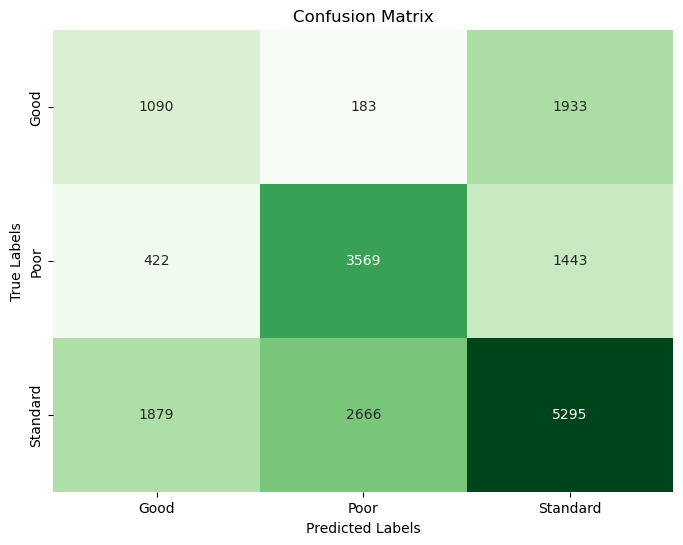

In [65]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, xticklabels=credit_score_le.inverse_transform([0, 1, 2]), yticklabels=credit_score_le.inverse_transform([0, 1, 2]))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show();